In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#  VARIABLES

- **ID**  : Identificador
- **MORA60**  : Indicador mora>60 días en el transcurso de un año luego de haberle otorgado el crédito
 (0:No tuvo mora 60, 1:Sí tuvo mora 60).
- **VAR01**  : Número de días de atraso máximo durante los 12 meses antes de la aprobación del crédito.
- **VAR02**  : Situación de la casa. (ALQUILADA,FAMILIAR,OTRAS,PROPIA)
- **VAR03**  : Edad 
- **VAR04**  : Fecha ingreso al empleo.
- **VAR05**  : Máxima antigüedad con Tarjeta de crédito en el Sistema Financiero (en meses).
- **VAR06**  : Número de meses con algún producto Pasivo (ahorro) durante los 12 meses antes de la aprobación del crédito.
- **VAR07**  : Ingreso mensual.
- **VAR08**  : Monto de Línea de crédito Tarjeta de Crédito en el Sistema Financiero.
- **VAR09**  : Monto de Saldo deudor promedio total en el Sistema Financiero.
- **VAR10**  : Score con el que fue aprobada la Tarjeta de crédito en el Banco.
- **VAR11**  : Número de veces con Abono de Pago de Haberes en el Banco durante los 12 meses antes de la aprobación del crédito.
- **VAR12**  : Zona geográfica.
- **VAR13**  : Máxima clasificación de Riesgos SBS  durante los 12 meses antes de la aprobación del crédito (0: Normal, 1:CPP,
2:Deficiente, 3:Dudoso, 4:Pérdida).
- **VAR14**  : Nivel educativo.


In [2]:
ren_columns = ['MORA60','DATRASO', 'SCASA', 'EDAD', 'FING', 'MAXANT', 
               'NMESES', 'INGREM', 'MONTOLC', 'MONTOSD', 'SCORE', 
               'NROPAGOAB', 'ZONA', 'CALIFSBS', 'NEDUCAT']
df = pd.read_excel('caso_TC.xlsx', index_col='ID')
df.columns = ren_columns
df.head()

,MORA60,DATRASO,SCASA,EDAD,FING,MAXANT,NMESES,INGREM,MONTOLC,MONTOSD,SCORE,NROPAGOAB,ZONA,CALIFSBS,NEDUCAT
ID,,,,,,,,,,,,,,,
1,0,235,FAMILIAR,30,2007-06-01,93,5,3500.0,0.00,0.00,214,5,Lima,4,PROFESIONAL
2,0,18,FAMILIAR,32,2005-02-01,9,12,900.0,1824.67,1933.75,175,12,La Libertad,1,TECNICO
3,0,0,FAMILIAR,26,2003-08-01,8,2,2400.0,2797.38,188.29,187,0,Lima,0,PROFESIONAL
4,0,0,FAMILIAR,36,2003-07-01,20,12,2700.0,0.00,0.00,187,12,Ancash,0,TECNICO
5,0,0,FAMILIAR,46,2006-11-01,0,1,3100.0,2000.00,11010.65,189,0,Lima,0,TECNICO


In [3]:
df.describe()

,MORA60,DATRASO,EDAD,MAXANT,NMESES,INGREM,MONTOLC,MONTOSD,SCORE,NROPAGOAB,CALIFSBS
count,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000
mean,0.700000,4.48080,36.429400,25.386000,10.571000,4373.572006,10236.736330,5732.438204,196.762400,7.90080,0.563600
std,0.458303,13.94524,9.787225,32.014265,3.396125,5393.520235,19853.871452,10869.692111,19.416316,5.27755,0.902728
min,0.000000,0.00000,20.000000,0.000000,0.000000,123.700000,0.000000,0.000000,134.000000,0.00000,0.000000
25%,0.000000,0.00000,29.000000,0.000000,12.000000,1400.000000,389.365000,283.605000,182.000000,0.00000,0.000000
50%,1.000000,0.00000,34.000000,12.000000,12.000000,2400.000000,2915.955000,2077.105000,197.000000,12.00000,0.000000
75%,1.000000,2.00000,42.000000,39.000000,12.000000,4900.000000,9763.387500,5384.220000,212.000000,12.00000,1.000000
max,1.000000,245.00000,85.000000,130.000000,12.000000,30000.000000,121543.400000,57094.380000,266.000000,12.00000,4.000000


In [4]:
for c in df.columns:
    if (df[c].dtype) not in  ('int64', 'float64'):
        print 'var : {}     type: {}'.format(c, df[c].dtype)

var : SCASA     type: object
var : FING     type: datetime64[ns]
var : ZONA     type: object
var : NEDUCAT     type: object


# 1. Preprocessing
## 1.1 Working with categorical variables

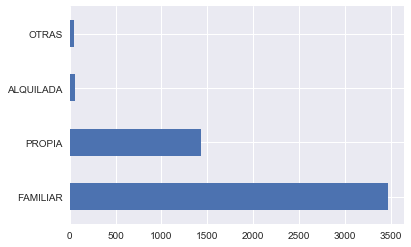

In [5]:
df['SCASA'].value_counts().plot(kind='barh');

In [6]:
df['SCASA'] = df['SCASA'].apply(lambda x: x if x not in ['PROPIA', 'ALQUILADA', 'OTRAS'] else 'OTRAS')
new_SCASA = pd.get_dummies(df['SCASA'], prefix='SCASA', prefix_sep='_')
new_SCASA.drop('SCASA_OTRAS', inplace=True, axis=1)
new_SCASA.head()

,SCASA_FAMILIAR
ID,
1,1
2,1
3,1
4,1
5,1


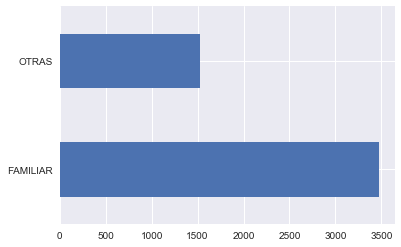

In [7]:
df['SCASA'].value_counts().plot(kind='barh');

In [8]:
import datetime as dtm
curr = dtm.date(2017,10,11)
FING = df['FING'].apply(lambda x: curr - dtm.date(x.year, x.month, x.day))
FING = FING.apply(lambda x: round(x.days/30.))
df['FING'] = FING

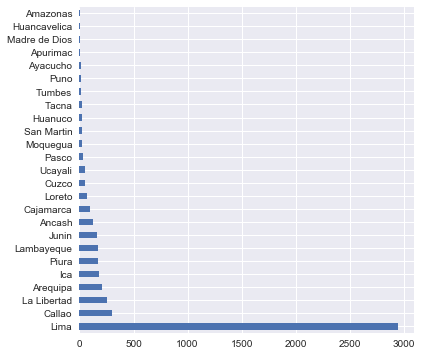

In [9]:
f, ax = plt.subplots(figsize=(6,6));
df['ZONA'].value_counts().plot(kind='barh');

In [10]:
df['ZONA'] = df['ZONA'].apply(lambda x: x.upper() if x in ['Lima'] else 'PROVINCIA')
new_ZONA = pd.get_dummies(df['ZONA'], prefix='ZONA', prefix_sep='_')
new_ZONA.drop('ZONA_PROVINCIA', inplace=True, axis=1)
new_ZONA.head()

,ZONA_LIMA
ID,
1,1
2,0
3,1
4,0
5,1


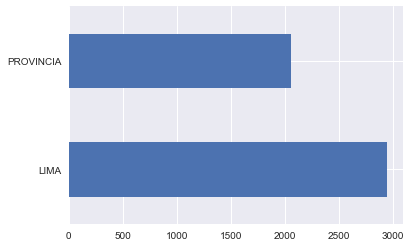

In [11]:
df['ZONA'].value_counts().plot(kind='barh');

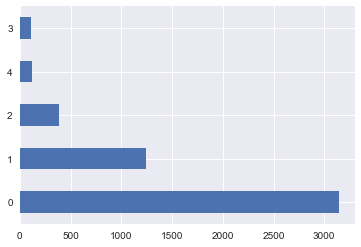

In [12]:
df['CALIFSBS'].value_counts().plot(kind='barh');

In [13]:
df['CALIFSBS'] = df['CALIFSBS'].map(dict([(0, 'NORM'),
                                         (1, 'OTRO'),
                                         (2, 'OTRO'),
                                         (3, 'OTRO'),
                                         (4, 'OTRO')]))
new_CALIFSBS = pd.get_dummies(df['CALIFSBS'], prefix='CALIFSBS', prefix_sep='_')
new_CALIFSBS.drop('CALIFSBS_OTRO', inplace=True, axis=1)
new_CALIFSBS.head()

,CALIFSBS_NORM
ID,
1,0
2,0
3,1
4,1
5,1


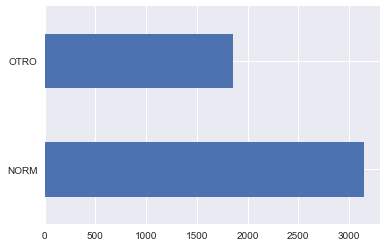

In [14]:
df['CALIFSBS'].value_counts().plot(kind='barh');

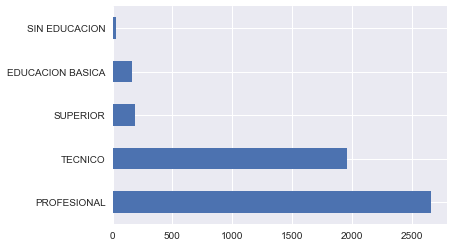

In [15]:
df['NEDUCAT'].value_counts().plot(kind='barh');

In [16]:
df['NEDUCAT'] = df['NEDUCAT'].apply(lambda x: x if x in ['PROFESIONAL'] else 'OTRO')
new_NEDUCAT = pd.get_dummies(df['NEDUCAT'], prefix='NEDUCAT', prefix_sep='_')
new_NEDUCAT.drop('NEDUCAT_OTRO', inplace=True, axis=1)
new_NEDUCAT.head()

,NEDUCAT_PROFESIONAL
ID,
1,1
2,0
3,1
4,0
5,0


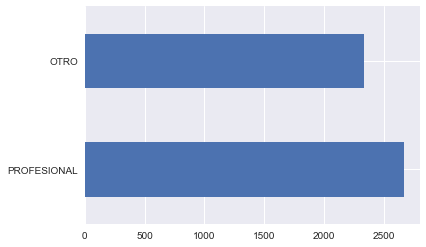

In [17]:
df['NEDUCAT'].value_counts().plot(kind='barh');

## 1.2 Dataframe with numeric variables

In [128]:
data = pd.concat([df, new_SCASA, new_ZONA, new_CALIFSBS, new_NEDUCAT], axis=1)
data.drop(['SCASA', 'ZONA', 'CALIFSBS', 'NEDUCAT'], axis=1, inplace=True)

In [85]:
data.head()

,MORA60,DATRASO,EDAD,FING,MAXANT,NMESES,INGREM,MONTOLC,MONTOSD,SCORE,NROPAGOAB,SCASA_FAMILIAR,ZONA_LIMA,CALIFSBS_NORM,NEDUCAT_PROFESIONAL
ID,,,,,,,,,,,,,,,
1,0,235,30,126.0,93,5,3500.0,0.00,0.00,214,5,1,1,0,1
2,0,18,32,155.0,9,12,900.0,1824.67,1933.75,175,12,1,0,0,0
3,0,0,26,173.0,8,2,2400.0,2797.38,188.29,187,0,1,1,1,1
4,0,0,36,174.0,20,12,2700.0,0.00,0.00,187,12,1,0,1,0
5,0,0,46,133.0,0,1,3100.0,2000.00,11010.65,189,0,1,1,1,0


In [129]:
x = data.drop(['MORA60'], axis=1)
y = data['MORA60']

## 1.3 Explore the data

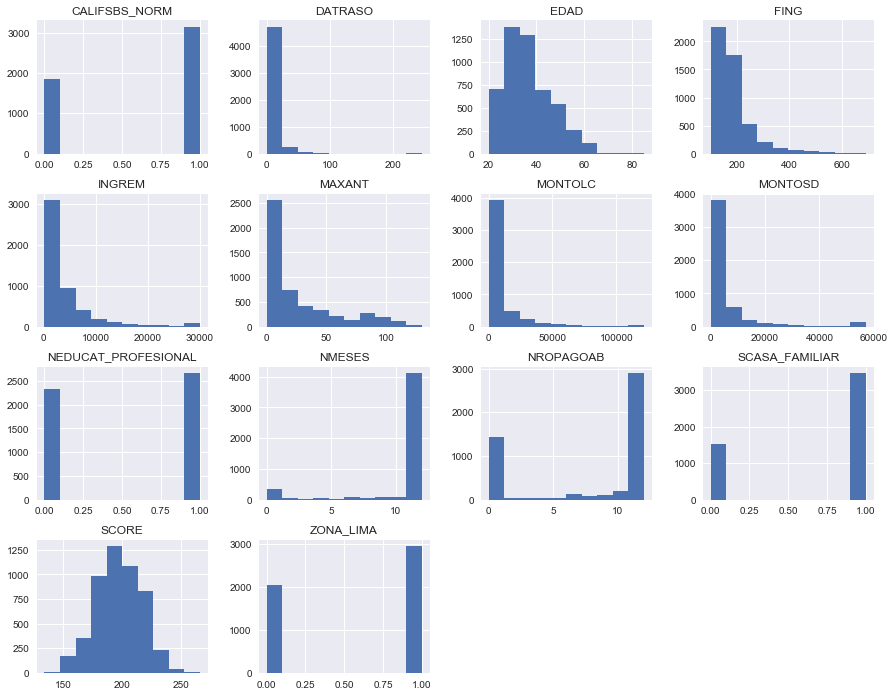

In [88]:
x.hist(figsize=(15,12));
plt.savefig('explore01');

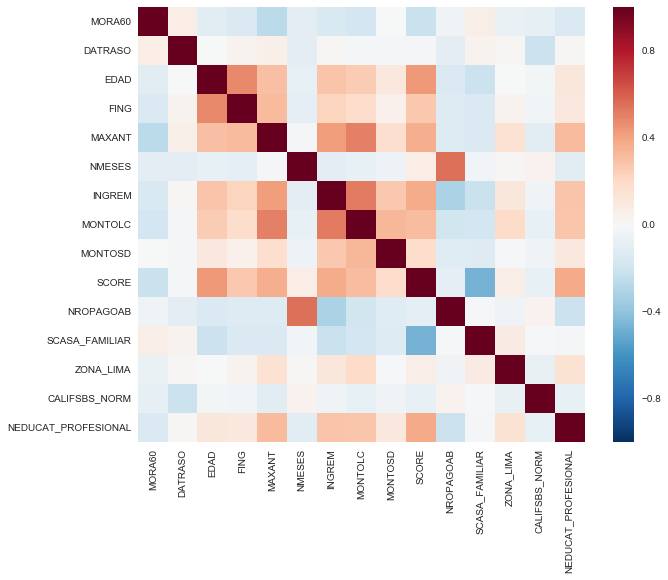

In [22]:
f, ax = plt.subplots(figsize=(10, 8))
corr = data.corr()
sns.heatmap(corr);
plt.savefig('explore02.jpg')

## Select the best clasificator

In [89]:
from sklearn import cross_validation
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
import warnings
warnings.filterwarnings('ignore')

In [130]:
x_train, x_test, y_train, y_test = cross_validation.train_test_split(x, y, test_size=0.2, random_state=42)

In [132]:
x_test.head()

,DATRASO,EDAD,FING,MAXANT,NMESES,INGREM,MONTOLC,MONTOSD,SCORE,NROPAGOAB,SCASA_FAMILIAR,ZONA_LIMA,CALIFSBS_NORM,NEDUCAT_PROFESIONAL
ID,,,,,,,,,,,,,,
1502,238,40,156.0,17,0,10000.00,25526.76,25526.76,185,0,1,1,0,1
2587,0,38,264.0,0,3,3905.00,30689.94,249.43,185,0,1,1,0,0
2654,0,23,134.0,0,12,932.46,0.00,1345.86,175,12,0,1,1,0
1056,0,41,175.0,88,12,8500.00,2499.46,421.59,205,12,1,1,1,1
706,0,30,143.0,28,11,5500.00,15885.49,3838.74,219,8,1,1,0,1


In [91]:
ensembles = []
ensembles.append(('XG', XGBClassifier()))
ensembles.append(('AB', AdaBoostClassifier()))
ensembles.append(('GBM', GradientBoostingClassifier()))
ensembles.append(('RF', RandomForestClassifier()))
ensembles.append(('ET', ExtraTreesClassifier()))

results = []
names = []
for name, model in ensembles:
    skf = cross_validation.StratifiedKFold(y_train, 10, random_state=42)
    cv_results = cross_validation.cross_val_score(model, x_train, y_train, cv=skf,
                                                  scoring='roc_auc')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

XG: 0.738010 (0.032391)
AB: 0.729112 (0.037477)
GBM: 0.738793 (0.036593)
RF: 0.692746 (0.036609)
ET: 0.674812 (0.049575)


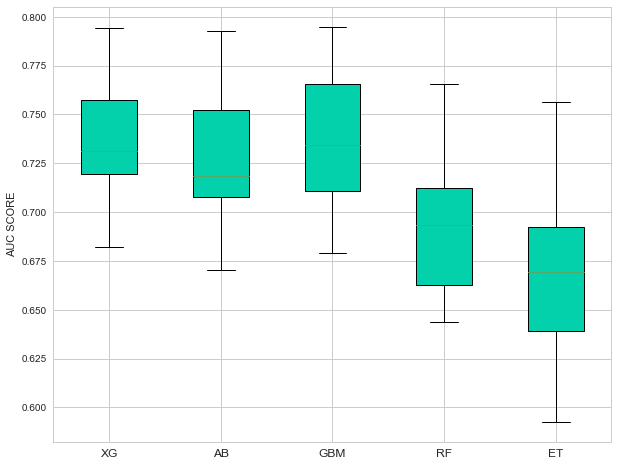

In [92]:
with plt.style.context(('seaborn-whitegrid')):
    f, ax = plt.subplots(figsize=(10, 8))
    b = plt.boxplot(results, patch_artist=True);
    ax.set_xticklabels(names, fontsize=12);
    plt.ylabel('AUC SCORE')
    
    colors = ['#03D1AB']*5
    for patch, color in zip(b['boxes'], colors):
            patch.set_facecolor(color)


In [225]:
print(plt.style.available)

[u'seaborn-darkgrid', u'seaborn-notebook', u'classic', u'seaborn-ticks', u'grayscale', u'bmh', u'seaborn-talk', u'dark_background', u'ggplot', u'fivethirtyeight', u'_classic_test', u'seaborn-colorblind', u'seaborn-deep', u'seaborn-whitegrid', u'seaborn-bright', u'seaborn-poster', u'seaborn-muted', u'seaborn-paper', u'seaborn-white', u'seaborn-pastel', u'seaborn-dark', u'seaborn', u'seaborn-dark-palette']


In [93]:
# Select model

model = GradientBoostingClassifier()
model.fit(x_train, y_train)
y_pred = model.predict_proba(x_test)

yn = pd.DataFrame(y_test)
yn['MORA_PRED'] = y_pred[:,1]
r = yn.sort_values(['MORA_PRED'], ascending=True)
pred_ord = yn.sort_values(['MORA_PRED'], ascending=True)
rango_deciles = pd.qcut(pred_ord['MORA_PRED'], 10)
grupos = yn.groupby(rango_deciles)['MORA60'].agg([sum, len, np.mean])

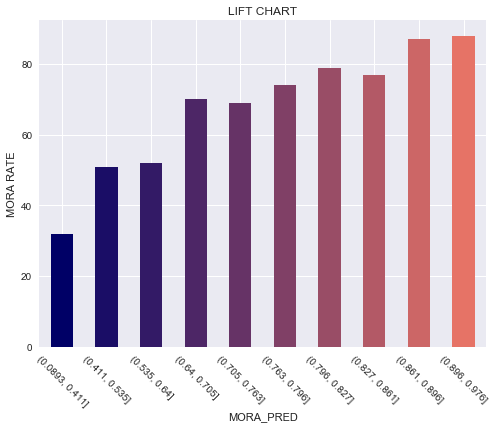

In [94]:
#PLOT LIFT CURVE

my_colors = [(x/10.0, x/20.0, 0.4) for x in range(10)]
f, ax = plt.subplots(figsize=(8, 6))
grupos['sum'].groupby([grupos.index]).sum().plot(kind='bar', color=my_colors);
plt.ylabel('MORA RATE');
plt.title('LIFT CHART')

for tick in ax.get_xticklabels():
        tick.set_rotation(-45)
plt.savefig('analysis02.png');

In [95]:
grupos

,sum,len,mean
MORA_PRED,,,
"(0.0893, 0.411]",32,100,0.32
"(0.411, 0.535]",51,100,0.51
"(0.535, 0.64]",52,100,0.52
"(0.64, 0.705]",70,100,0.70
"(0.705, 0.763]",69,100,0.69
"(0.763, 0.796]",74,100,0.74
"(0.796, 0.827]",79,100,0.79
"(0.827, 0.861]",77,100,0.77
"(0.861, 0.896]",87,100,0.87


In [366]:
model

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=100, presort='auto', random_state=None,
              subsample=1.0, verbose=0, warm_start=False)

## Tuning parameters

In [367]:
n_estimators = [100, 200, 300, 400, 500]
learning_rate = [0.0001, 0.001, 0.01, 0.1]
param_grid = dict(learning_rate=learning_rate, n_estimators=n_estimators)

grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring='roc_auc', cv=skf)
grid_result = grid.fit(x_train, y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
for params, mean_score, scores in grid_result.grid_scores_:
    print("%f (%f) with: %r" % (scores.mean(), scores.std(), params))

Best: 0.741310 using {'n_estimators': 500, 'learning_rate': 0.01}
0.669740 (0.042328) with: {'n_estimators': 100, 'learning_rate': 0.0001}
0.672092 (0.040083) with: {'n_estimators': 200, 'learning_rate': 0.0001}
0.674560 (0.041022) with: {'n_estimators': 300, 'learning_rate': 0.0001}
0.679957 (0.045565) with: {'n_estimators': 400, 'learning_rate': 0.0001}
0.680457 (0.047032) with: {'n_estimators': 500, 'learning_rate': 0.0001}
0.689497 (0.045341) with: {'n_estimators': 100, 'learning_rate': 0.001}
0.701282 (0.045470) with: {'n_estimators': 200, 'learning_rate': 0.001}
0.708181 (0.042801) with: {'n_estimators': 300, 'learning_rate': 0.001}
0.711441 (0.042263) with: {'n_estimators': 400, 'learning_rate': 0.001}
0.714516 (0.041733) with: {'n_estimators': 500, 'learning_rate': 0.001}
0.720964 (0.038840) with: {'n_estimators': 100, 'learning_rate': 0.01}
0.731802 (0.036638) with: {'n_estimators': 200, 'learning_rate': 0.01}
0.736758 (0.036047) with: {'n_estimators': 300, 'learning_rate': 0.

In [368]:
model = GradientBoostingClassifier(learning_rate=0.01, n_estimators=500)
param_grid = dict(max_depth=np.array([3,5,7,9,12,15,17,25]))

grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring='roc_auc', cv=skf)
grid_result = grid.fit(x_train, y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
for params, mean_score, scores in grid_result.grid_scores_:
    print("%f (%f) with: %r" % (scores.mean(), scores.std(), params))

Best: 0.741282 using {'max_depth': 3}
0.741273 (0.036046) with: {'max_depth': 3}
0.736019 (0.036437) with: {'max_depth': 5}
0.730494 (0.035880) with: {'max_depth': 7}
0.724276 (0.034273) with: {'max_depth': 9}
0.709238 (0.035815) with: {'max_depth': 12}
0.671635 (0.046419) with: {'max_depth': 15}
0.622093 (0.041728) with: {'max_depth': 17}
0.589703 (0.027334) with: {'max_depth': 25}


In [389]:
#grid_result is model tuneded

y_pred = grid_result.predict_proba(x_test)

yn = pd.DataFrame(y_test)
yn['MORA_PRED'] = y_pred[:,1]
pred_ord = yn.sort_values(['MORA_PRED'], ascending=True)
rango_deciles = pd.qcut(pred_ord['MORA_PRED'], 10)
grupos = yn.groupby(rango_deciles)['MORA60'].agg([sum, len, np.mean])

In [390]:
grupos

,sum,len,mean
MORA_PRED,,,
"(0.155, 0.43]",34,100,0.34
"(0.43, 0.56]",42,100,0.42
"(0.56, 0.648]",60,100,0.60
"(0.648, 0.703]",66,100,0.66
"(0.703, 0.753]",70,100,0.70
"(0.753, 0.788]",76,100,0.76
"(0.788, 0.817]",77,100,0.77
"(0.817, 0.85]",83,100,0.83
"(0.85, 0.882]",83,100,0.83


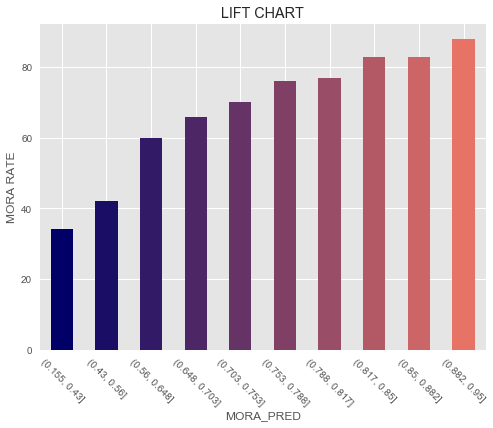

In [391]:
def plot_lift(grupos):
    my_colors = [(x/10.0, x/20.0, 0.4) for x in range(10)]
    f, ax = plt.subplots(figsize=(8, 6))
    grupos['mean'].groupby([grupos.index]).sum().plot(kind='bar', color=my_colors);
    plt.ylabel('MORA RATE');
    plt.title('LIFT CHART')

    for tick in ax.get_xticklabels():
            tick.set_rotation(-45)

In [133]:
#feature importances
del model
model = GradientBoostingClassifier(learning_rate=0.01, n_estimators=500, max_depth=3, random_state=42)
gbm = model.fit(x_train, y_train)

In [134]:
np.sort(gbm.feature_importances_)

array([  4.10979048e-05,   1.71877285e-03,   2.77197158e-03,
         2.02356760e-02,   5.03308921e-02,   5.97047796e-02,
         6.46134728e-02,   7.96497831e-02,   8.05211045e-02,
         8.31253194e-02,   8.79105347e-02,   1.44371995e-01,
         1.55775015e-01,   1.69229585e-01])

In [135]:
my_c = [(float(x/20.), 0.4, float(x/14.)) for x in reversed((range(14)))]

def plot_model_var_imp(model, x, y):
    f, ax = plt.subplots()
    imp = pd.DataFrame( 
        model.feature_importances_  , 
        columns = ['Importance'] , 
        index = x.columns 
    )
    imp = imp.sort_values( ['Importance'], ascending = True)
    imp[:].plot( kind = 'barh', figsize=(8,6), ax=ax, title='FEATURE IMPORTANCE', colors=my_c, legend=False);


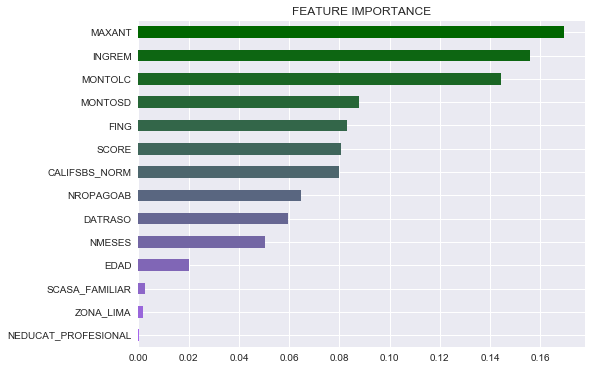

In [136]:
plot_model_var_imp(gbm, x_test, y_test)

In [137]:
y_pred = gbm.predict_proba(x_test)

In [144]:
del d_test
d_test = pd.DataFrame(x_test)
d_test['MORA60'] = y_test

d_test['MORA_PRED'] = y_pred[:,1]
pred_ord = d_test.sort_values(['MORA_PRED'], ascending=True)
rango_deciles = pd.qcut(pred_ord['MORA_PRED'], 10)

In [155]:
def plot_lift(grupos, ylabel):
    my_colors = [(x/10.0, x/20.0, 0.4) for x in range(10)]
    f, ax = plt.subplots(figsize=(8, 6))
    grupos['mean'].groupby([grupos.index]).sum().plot(kind='bar', color=my_colors);
    plt.ylabel(ylabel);
    plt.title('LIFT CHART')

    for tick in ax.get_xticklabels():
            tick.set_rotation(-45)

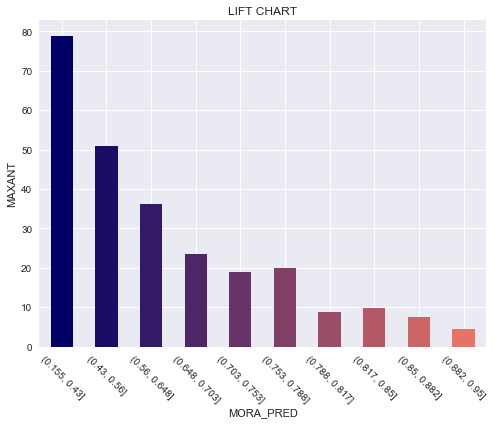

In [156]:
grupos = d_test.groupby(rango_deciles)['MAXANT'].agg([len, np.mean, sum])
plot_lift(grupos,'MAXANT')

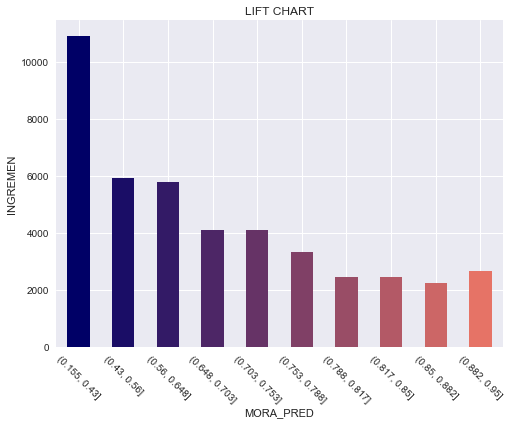

In [158]:
grupos = d_test.groupby(rango_deciles)['INGREM'].agg([len, np.mean])
plot_lift(grupos, 'INGREMEN')

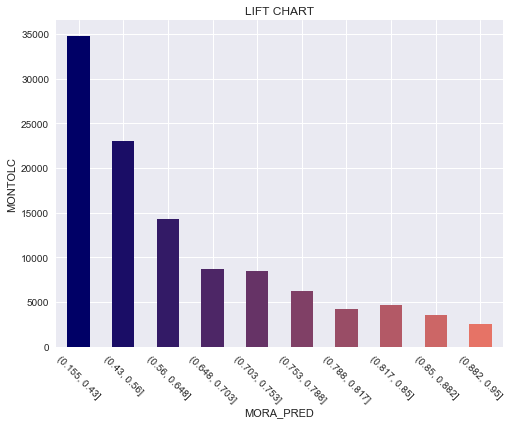

In [160]:
grupos = d_test.groupby(rango_deciles)['MONTOLC'].agg([len, np.mean])
plot_lift(grupos, 'MONTOLC')

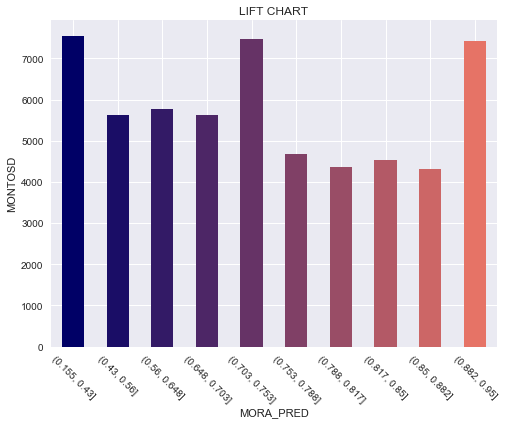

In [161]:
grupos = d_test.groupby(rango_deciles)['MONTOSD'].agg([len, np.mean])
plot_lift(grupos, 'MONTOSD')

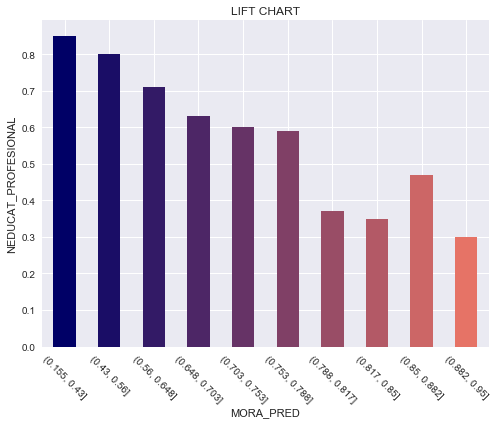

In [163]:
grupos = d_test.groupby(rango_deciles)['NEDUCAT_PROFESIONAL'].agg([len, np.mean])
plot_lift(grupos, 'NEDUCAT_PROFESIONAL')

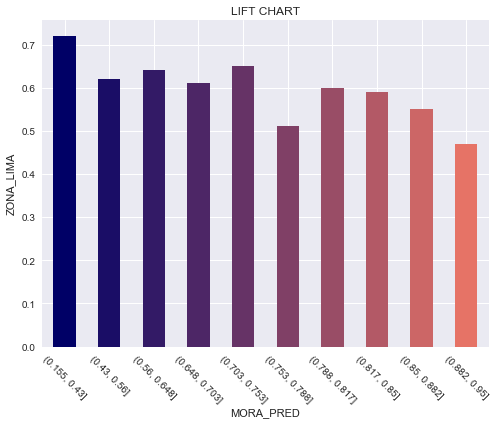

In [165]:
grupos = d_test.groupby(rango_deciles)['ZONA_LIMA'].agg([len, np.mean])
plot_lift(grupos, 'ZONA_LIMA')